In [33]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import category_encoders as ce 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as  plt 

In [15]:
df=pd.read_csv('./drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [17]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [18]:
y=df['Drug']

In [19]:
y.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [20]:
df.drop(columns='Drug',inplace=True)

In [21]:
x=df

In [22]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [23]:
s=StandardScaler()
encoder=ce.OrdinalEncoder()

In [25]:
x=encoder.fit_transform(x)

In [26]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1,1,25.355
1,47,2,2,1,13.093
2,47,2,2,1,10.114
3,28,1,3,1,7.798
4,61,1,2,1,18.043


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)

In [29]:
gini_model=DecisionTreeClassifier(criterion='gini',random_state=0)
gini_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
gini_y_pred=gini_model.predict(x_test)

In [31]:
print(metrics.classification_report(gini_y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        31
       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       0.91      1.00      0.95        10

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



In [34]:
from sklearn import tree 

In [35]:
cm=metrics.confusion_matrix(gini_y_pred,y_test)
cm 

array([[30,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 10]], dtype=int64)

In [36]:
y_test.value_counts()

DrugY    30
drugX    11
drugB     4
drugC     3
drugA     2
Name: Drug, dtype: int64

<Axes: >

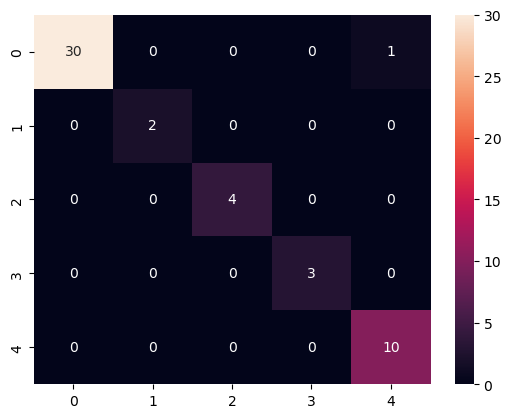

In [37]:
sns.heatmap(cm,annot=True)

[Text(0.625, 0.9, 'x[4] <= 14.638\ngini = 0.719\nsamples = 150\nvalue = [61, 21, 12, 13, 43]'),
 Text(0.5, 0.7, 'x[2] <= 1.5\ngini = 0.671\nsamples = 89\nvalue = [0, 21, 12, 13, 43]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.463\nsamples = 33\nvalue = [0, 21, 12, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 2.5\ngini = 0.357\nsamples = 56\nvalue = [0, 0, 0, 13, 43]'),
 Text(0.625, 0.3, 'x[3] <= 1.5\ngini = 0.499\nsamples = 27\nvalue = [0, 0, 0, 13, 14]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 14]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 29]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 61\nvalue = [61, 0, 0, 0, 0]')]

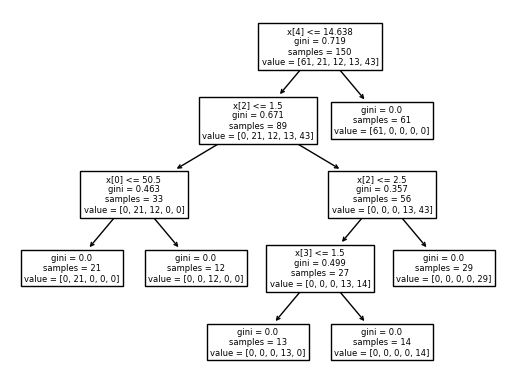

In [38]:
gini_model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
tree.plot_tree(gini_model.fit(x_train,y_train))

In [39]:
entropy_model=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=6)
entropy_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [40]:
entropy_model_y_pred=entropy_model.predict(x_test)

In [41]:
print(metrics.classification_report(entropy_model_y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        31
       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       0.91      1.00      0.95        10

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



[Text(0.625, 0.9, 'x[4] <= 14.638\nentropy = 2.039\nsamples = 150\nvalue = [61, 21, 12, 13, 43]'),
 Text(0.5, 0.7, 'x[2] <= 1.5\nentropy = 1.794\nsamples = 89\nvalue = [0, 21, 12, 13, 43]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.946\nsamples = 33\nvalue = [0, 21, 12, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 2.5\nentropy = 0.782\nsamples = 56\nvalue = [0, 0, 0, 13, 43]'),
 Text(0.625, 0.3, 'x[3] <= 1.5\nentropy = 0.999\nsamples = 27\nvalue = [0, 0, 0, 13, 14]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 14]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 29]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 61\nvalue = [61, 0, 0, 0, 0]')]

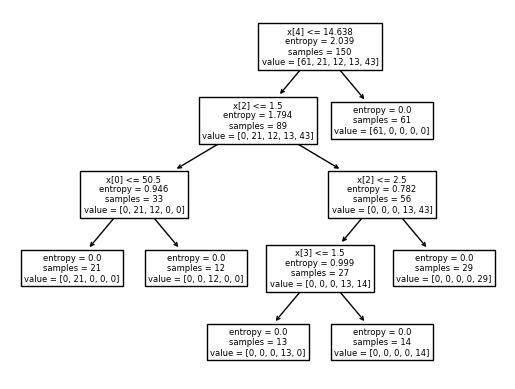

In [42]:
tree.plot_tree(entropy_model.fit(x_train,y_train))

In [43]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [46]:
r_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
r_model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
y_pred=r_model.predict(x_test)

In [48]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      0.67      0.80         3
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11

    accuracy                           0.98        50
   macro avg       0.95      0.93      0.93        50
weighted avg       0.98      0.98      0.98        50

